# Exploring Sleep Data

In [78]:
import pandas as pd
import numpy as np
from cmath import rect, phase
from math import radians, degrees, isnan
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# init sleep_df
filename = 'data/AutoSleep-20201220-to-20231002.csv'
sleep_df = pd.read_csv(filename, parse_dates=['bedtime', 'waketime'])
sleep_index = (pd.to_datetime(sleep_df['ISO8601'], utc=True) - pd.Timedelta(1, unit='D')).dt.strftime('%Y-%m-%d').to_numpy()
sleep_df.index = sleep_index
print(sleep_df.info(verbose=False))
# print(sleep_df.columns)
sleep_df

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2020-12-31 to 2023-09-30
Columns: 35 entries, ISO8601 to notes
dtypes: datetime64[ns](2), float64(20), int64(1), object(12)
memory usage: 257.6+ KB
None


ISO8601                 fromDate  \
2020-12-31  2021-01-01T21:59:59+01:00   Thursday, Dec 31, 2020   
2021-01-01  2021-01-02T21:59:59+01:00      Friday, Jan 1, 2021   
2021-01-02  2021-01-03T21:59:59+01:00    Saturday, Jan 2, 2021   
2021-01-03  2021-01-04T21:59:59+01:00      Sunday, Jan 3, 2021   
2021-01-04  2021-01-05T21:59:59+01:00      Monday, Jan 4, 2021   
...                               ...                      ...   
2023-09-26  2023-09-27T21:59:59+02:00    Tuesday, Sep 26, 2023   
2023-09-27  2023-09-28T21:59:59+02:00  Wednesday, Sep 27, 2023   
2023-09-28  2023-09-29T21:59:59+02:00   Thursday, Sep 28, 2023   
2023-09-29  2023-09-30T21:59:59+02:00     Friday, Sep 29, 2023   
2023-09-30  2023-10-01T21:59:59+02:00   Saturday, Sep 30, 2023   

                             toDate             bedtime            waketime  \
2020-12-31      Friday, Jan 1, 2021 2020-12-31 09:11:26 2020-12-31 17:30:00   
2021-01-01    Saturday, Jan 2, 2021 2021-01-01 09:42:00 2021-01-01 17:03:00   
2021-01-02      Sunday, Jan 3, 2021 2021-01-02 07:11:00 2021-01-02 17:20:00   
2021-01-03      Monday, Jan 4, 2021 2021-01-03 08:30:10 2021-01-03 19:00:00   
2021-01-04     Tuesday, Jan 5, 2021 2021-01-04 09:09:00 2021-01-04 17:31:00   
...                             ...                 ...                 ...   
2023-09-26  Wednesday, Sep 27, 2023 2023-09-26 06:35:00 2023-09-26 12:59:00   
2023-09-27   Thursday, Sep 28, 2023 2023-09-27 03:09:00 2023-09-27 12:00:00   
2023-09-28     Friday, Sep 29, 2023 2023-09-28 12:06:00 2023-09-28 13:14:00   
2023-09-29   Saturday, Sep 30, 2023 2023-09-29 00:12:00 2023-09-29 10:04:00   
2023-09-30      Sunday, Oct 1, 2023 2023-09-30 06:36:00 2023-09-30 11:31:00   

               inBed     awake fellAsleepIn  sessions    asleep  ... sleepHRV  \
2020-12-31  08:18:33  00:18:33     00:18:33         1  08:00:00  ...     43.0   
2021-01-01  07:21:00  00:00:00     00:00:00         1  07:21:00  ...     46.0   
2021-01-02  10:09:00  01:09:00     00:00:00         1  09:00:00  ...     61.0   
2021-01-03  10:29:49  00:00:49     00:00:49         1  10:29:00  ...     62.0   
2021-01-04  08:22:00  00:52:00     00:00:00         1  07:30:00  ...     61.0   
...              ...       ...          ...       ...       ...  ...      ...   
2023-09-26  06:24:00  00:18:00     00:00:00         1  06:42:00  ...     41.0   
2023-09-27  08:51:00  00:03:30     00:00:00         1  08:47:30  ...     69.0   
2023-09-28  01:08:00  00:00:00     00:00:00         1  01:08:00  ...     50.0   
2023-09-29  09:52:00  00:26:30     00:00:00         1  10:18:30  ...     46.0   
2023-09-30  04:55:00  00:03:30     00:00:00         1  04:58:30  ...     51.0   

            sleepHRVAvg7  SpO2Avg SpO2Min SpO2Max respAvg respMin  respMax  \
2020-12-31          55.0     94.5    90.0    98.0     NaN     NaN      NaN   
2021-01-01          53.0     93.7    92.0    96.0     NaN     NaN      NaN   
2021-01-02          51.0     92.6    87.0    96.0     NaN     NaN      NaN   
2021-01-03          53.0     92.7    85.0    98.0     NaN     NaN      NaN   
2021-01-04          52.0     96.5    93.0    99.0     NaN     NaN      NaN   
...                  ...      ...     ...     ...     ...     ...      ...   
2023-09-26          46.0     97.2    93.0   100.0    17.0    15.0     20.5   
2023-09-27          46.0     97.5    91.0   100.0    16.9    15.0     27.5   
2023-09-28          46.0     93.0    93.0    93.0     NaN     NaN      NaN   
2023-09-29          47.0     95.9    90.0   100.0    17.2    15.5     21.0   
2023-09-30          46.0     94.0    88.0   100.0    17.0    16.5     19.5   

            tags  notes  
2020-12-31   NaN    NaN  
2021-01-01   NaN    NaN  
2021-01-02   NaN    NaN  
2021-01-03   NaN    NaN  
2021-01-04   NaN    NaN  
...          ...    ...  
2023-09-26   NaN    NaN  
2023-09-27   NaN    NaN  
2023-09-28   NaN    NaN  
2023-09-29   NaN    NaN  
2023-09-30   NaN    NaN  

[916 rows x 35 columns]

In [80]:
# init and filter: rem_df -> filt_rem_df
filename = 'data/AutoSleep-20230613-to-20231002.csv'
rem_df = pd.read_csv(filename, parse_dates=['bedtime', 'waketime'])
rem_index = (pd.to_datetime(rem_df['ISO8601'], utc=True) - pd.Timedelta(1, unit='D')).dt.strftime('%Y-%m-%d').to_numpy()
rem_df.index = rem_index
filt_rem_df = rem_df.loc[rem_df['REM'].notnull()]
print(filt_rem_df.info(verbose=False))
filt_rem_df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 2023-06-14 to 2023-09-30
Columns: 35 entries, ISO8601 to notes
dtypes: datetime64[ns](2), float64(18), int64(3), object(12)
memory usage: 27.8+ KB
None


ISO8601                 fromDate  \
2023-09-25  2023-09-26T21:59:59+02:00     Monday, Sep 25, 2023   
2023-09-26  2023-09-27T21:59:59+02:00    Tuesday, Sep 26, 2023   
2023-09-27  2023-09-28T21:59:59+02:00  Wednesday, Sep 27, 2023   
2023-09-29  2023-09-30T21:59:59+02:00     Friday, Sep 29, 2023   
2023-09-30  2023-10-01T21:59:59+02:00   Saturday, Sep 30, 2023   

                             toDate             bedtime            waketime  \
2023-09-25    Tuesday, Sep 26, 2023 2023-09-25 01:53:00 2023-09-25 10:34:00   
2023-09-26  Wednesday, Sep 27, 2023 2023-09-26 06:35:00 2023-09-26 12:59:00   
2023-09-27   Thursday, Sep 28, 2023 2023-09-27 03:09:00 2023-09-27 12:00:00   
2023-09-29   Saturday, Sep 30, 2023 2023-09-29 00:12:00 2023-09-29 10:04:00   
2023-09-30      Sunday, Oct 1, 2023 2023-09-30 06:36:00 2023-09-30 11:31:00   

               inBed     awake fellAsleepIn  sessions    asleep  ... sleepHRV  \
2023-09-25  08:41:00  00:27:30     00:00:00         1  09:08:30  ...       40   
2023-09-26  06:24:00  00:18:00     00:00:00         1  06:42:00  ...       41   
2023-09-27  08:51:00  00:03:30     00:00:00         1  08:47:30  ...       69   
2023-09-29  09:52:00  00:26:30     00:00:00         1  10:18:30  ...       46   
2023-09-30  04:55:00  00:03:30     00:00:00         1  04:58:30  ...       51   

            sleepHRVAvg7  SpO2Avg SpO2Min SpO2Max respAvg respMin  respMax  \
2023-09-25            45     97.1    94.0    99.0    16.3    15.0     19.5   
2023-09-26            46     97.2    93.0   100.0    17.0    15.0     20.5   
2023-09-27            46     97.5    91.0   100.0    16.9    15.0     27.5   
2023-09-29            47     95.9    90.0   100.0    17.2    15.5     21.0   
2023-09-30            46     94.0    88.0   100.0    17.0    16.5     19.5   

            tags  notes  
2023-09-25   NaN    NaN  
2023-09-26   NaN    NaN  
2023-09-27   NaN    NaN  
2023-09-29   NaN    NaN  
2023-09-30   NaN    NaN  

[5 rows x 35 columns]

In [81]:
# merged sleep_df and filt_rem_df into merged_df
merged_df = sleep_df.copy()

on = filt_rem_df.columns.intersection(sleep_df.columns).to_list()
others = filt_rem_df.columns.difference(sleep_df.columns).to_list()
for o in others:
    merged_df[o] = ''

merged_df.loc[sleep_df.index.isin(filt_rem_df.index), on] = filt_rem_df
merged_df.loc[sleep_df.index.isin(filt_rem_df.index), others] = filt_rem_df
print(merged_df.info(verbose=False))
# print(merged_df.columns)
merged_df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2020-12-31 to 2023-09-30
Columns: 37 entries, ISO8601 to REMAvg7
dtypes: datetime64[ns](2), float64(20), int64(1), object(14)
memory usage: 271.9+ KB
None


ISO8601                 fromDate  \
2023-09-26  2023-09-27T21:59:59+02:00    Tuesday, Sep 26, 2023   
2023-09-27  2023-09-28T21:59:59+02:00  Wednesday, Sep 27, 2023   
2023-09-28  2023-09-29T21:59:59+02:00   Thursday, Sep 28, 2023   
2023-09-29  2023-09-30T21:59:59+02:00     Friday, Sep 29, 2023   
2023-09-30  2023-10-01T21:59:59+02:00   Saturday, Sep 30, 2023   

                             toDate             bedtime            waketime  \
2023-09-26  Wednesday, Sep 27, 2023 2023-09-26 06:35:00 2023-09-26 12:59:00   
2023-09-27   Thursday, Sep 28, 2023 2023-09-27 03:09:00 2023-09-27 12:00:00   
2023-09-28     Friday, Sep 29, 2023 2023-09-28 12:06:00 2023-09-28 13:14:00   
2023-09-29   Saturday, Sep 30, 2023 2023-09-29 00:12:00 2023-09-29 10:04:00   
2023-09-30      Sunday, Oct 1, 2023 2023-09-30 06:36:00 2023-09-30 11:31:00   

               inBed     awake fellAsleepIn  sessions    asleep  ... SpO2Avg  \
2023-09-26  06:24:00  00:18:00     00:00:00         1  06:42:00  ...    97.2   
2023-09-27  08:51:00  00:03:30     00:00:00         1  08:47:30  ...    97.5   
2023-09-28  01:08:00  00:00:00     00:00:00         1  01:08:00  ...    93.0   
2023-09-29  09:52:00  00:26:30     00:00:00         1  10:18:30  ...    95.9   
2023-09-30  04:55:00  00:03:30     00:00:00         1  04:58:30  ...    94.0   

            SpO2Min  SpO2Max respAvg respMin respMax tags  notes       REM  \
2023-09-26     93.0    100.0    17.0    15.0    20.5  NaN    NaN  02:01:30   
2023-09-27     91.0    100.0    16.9    15.0    27.5  NaN    NaN  02:10:00   
2023-09-28     93.0     93.0     NaN     NaN     NaN  NaN    NaN             
2023-09-29     90.0    100.0    17.2    15.5    21.0  NaN    NaN  02:59:00   
2023-09-30     88.0    100.0    17.0    16.5    19.5  NaN    NaN  01:13:30   

             REMAvg7  
2023-09-26  02:02:25  
2023-09-27  01:58:21  
2023-09-28            
2023-09-29  02:10:12  
2023-09-30  02:05:25  

[5 rows x 37 columns]

In [82]:
# deleted 7-day average columns
slim_cols = ['ISO8601', 'fromDate', 'toDate', 'bedtime', 'waketime', 'inBed', 'awake',
              'fellAsleepIn', 'sessions', 'asleep', 'efficiency', 'quality',
              'deep', 'sleepBPM', 'dayBPM', 'wakingBPM', 'hrv', 'sleepHRV',
              'SpO2Avg', 'SpO2Min', 'SpO2Max', 'respAvg', 'respMin', 'respMax',
              'REM']

slim_df = merged_df.loc[:, slim_cols]
print(slim_df.info(verbose=False))
# print(len(clean_df))
# clean_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 2020-12-31 to 2023-09-30
Columns: 25 entries, ISO8601 to REM
dtypes: datetime64[ns](2), float64(12), int64(1), object(10)
memory usage: 186.1+ KB
None


In [83]:
# deleted outliers (>11 hrs, < 2hrs)
clean_df = slim_df.copy()
clean_df['asleep'] = np.round(pd.to_timedelta(clean_df['asleep']).dt.total_seconds() / 3600, 2)
clean_df = clean_df.loc[(clean_df['asleep'] < 11) & (clean_df['asleep'] > 2)]
print(clean_df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 2020-12-31 to 2023-09-30
Columns: 25 entries, ISO8601 to REM
dtypes: datetime64[ns](2), float64(13), int64(1), object(9)
memory usage: 180.6+ KB
None


In [84]:
def assign_timezones(old_df, local_tz, current_tz, start_date=None, end_date=None):

    df = old_df.copy()

    def localize_and_convert(time_ser, iso_ser):
        bi_iso_ser = [1 if x[-4] == '2' else 0 for x in iso_ser]
        local_ser = time_ser.dt.tz_localize(current_tz, ambiguous=bi_iso_ser, nonexistent='shift_backward')
        cur_ser = local_ser.dt.tz_convert(local_tz)
        dates = cur_ser.dt.strftime('%Y-%m-%d')
        times = cur_ser.dt.strftime('%Y-%m-%d %H:%M:%S')
        return dates, times

    def filter(column, date):
        if end_date and not start_date:
            time_ser = df.loc[df.index < end_date, column]
            iso_ser = df.loc[df.index < end_date, 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[df.index < end_date, column] = times
            df.loc[df.index < end_date, date] = dates
            df.loc[df.index < end_date, 'tz'] = local_tz

        elif start_date and not end_date:
            time_ser = df.loc[df.index >= start_date, column]
            iso_ser = df.loc[df.index >= start_date, 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[df.index >= start_date, column] = times
            df.loc[df.index >= start_date, date] = dates
            df.loc[df.index >= start_date, 'tz'] = local_tz

        else:
            time_ser = df.loc[(df.index >= start_date) & (df.index < end_date), column]
            iso_ser = df.loc[(df.index >= start_date) & (df.index < end_date), 'ISO8601']
            dates, times = localize_and_convert(time_ser, iso_ser)
            df.loc[(df.index >= start_date) & (df.index < end_date), column] = times
            df.loc[(df.index >= start_date) & (df.index < end_date), date] = dates
            df.loc[(df.index >= start_date) & (df.index < end_date), 'tz'] = local_tz

    columns = ['bedtime', 'waketime']
    for col in columns:
        if col == 'bedtime':
            filter(col, 'fromDate')
        elif col == 'waketime':
            filter(col, 'toDate')
        else:
            print('error')

    return df

In [85]:
# formatted dates to be accurate to time zones and created categorical tz column
current_tz = 'Europe/Berlin'
tz_df = clean_df.copy()
tz_df['tz'] = ''
tz_df = assign_timezones(tz_df, 'US/Mountain', current_tz, end_date='2021-05-10')
tz_df = assign_timezones(tz_df, 'US/Eastern', current_tz, start_date='2021-05-10', end_date='2022-03-04')
tz_df = assign_timezones(tz_df, 'Europe/Dublin', current_tz, start_date='2022-03-04', end_date='2022-04-02')
tz_df = assign_timezones(tz_df, 'US/Eastern', current_tz, start_date='2022-04-02', end_date='2022-09-29')
tz_df = assign_timezones(tz_df, 'Europe/Berlin', current_tz, start_date='2022-09-29')
tz_df['tz'].unique()
tz_df.drop(columns=['ISO8601', 'fromDate', 'toDate'], inplace=True)
tz_df.tail()

bedtime            waketime     inBed     awake  \
2023-09-25 2023-09-25 01:53:00 2023-09-25 10:34:00  08:41:00  00:27:30   
2023-09-26 2023-09-26 06:35:00 2023-09-26 12:59:00  06:24:00  00:18:00   
2023-09-27 2023-09-27 03:09:00 2023-09-27 12:00:00  08:51:00  00:03:30   
2023-09-29 2023-09-29 00:12:00 2023-09-29 10:04:00  09:52:00  00:26:30   
2023-09-30 2023-09-30 06:36:00 2023-09-30 11:31:00  04:55:00  00:03:30   

           fellAsleepIn  sessions  asleep  efficiency   quality      deep  \
2023-09-25     00:00:00         1    9.14       105.3  06:33:28  00:59:00   
2023-09-26     00:00:00         1    6.70       104.7  05:15:45  01:25:30   
2023-09-27     00:00:00         1    8.79        99.3  06:44:19  01:02:30   
2023-09-29     00:00:00         1   10.31       104.5  07:51:19  01:05:00   
2023-09-30     00:00:00         1    4.97       101.2  04:00:34  00:51:30   

            ...   hrv  sleepHRV  SpO2Avg  SpO2Min  SpO2Max  respAvg  respMin  \
2023-09-25  ...  67.0      40.0     97.1     94.0     99.0     16.3     15.0   
2023-09-26  ...   NaN      41.0     97.2     93.0    100.0     17.0     15.0   
2023-09-27  ...   NaN      69.0     97.5     91.0    100.0     16.9     15.0   
2023-09-29  ...   NaN      46.0     95.9     90.0    100.0     17.2     15.5   
2023-09-30  ...   NaN      51.0     94.0     88.0    100.0     17.0     16.5   

            respMax       REM             tz  
2023-09-25     19.5  02:19:30  Europe/Berlin  
2023-09-26     20.5  02:01:30  Europe/Berlin  
2023-09-27     27.5  02:10:00  Europe/Berlin  
2023-09-29     21.0  02:59:00  Europe/Berlin  
2023-09-30     19.5  01:13:30  Europe/Berlin  

[5 rows x 23 columns]

In [86]:
# new column for categorical dates: Early 2021, Late 2021, Early 2022, Late 2022, Early 2023, Late 2023 (cat_df)
def date_cats(dates):
    cats = []
    for date in dates:
        year = date[:4]
        if int(date[5:7]) < 7:
            season = 'Early'
        else:
            season = 'Late'
        cats.append(f'{season} {year}')

    return cats

cat_df = tz_df.copy()
cat_df['date_cats'] = date_cats(cat_df.index)

In [87]:
# get difference between "asleep" and the time between "bedtime" and "waketime"
timed_sleep = (cat_df['waketime'] - cat_df['bedtime'])
cat_df['timed_sleep_hrs'] = np.round((timed_sleep.dt.total_seconds() / 3600), 2)
cat_df['time_diff'] = cat_df['asleep'] - cat_df['timed_sleep_hrs']
cat_df.head()

bedtime            waketime     inBed     awake  \
2020-12-31 2020-12-31 01:11:26 2020-12-31 09:30:00  08:18:33  00:18:33   
2021-01-01 2021-01-01 01:42:00 2021-01-01 09:03:00  07:21:00  00:00:00   
2021-01-02 2021-01-01 23:11:00 2021-01-02 09:20:00  10:09:00  01:09:00   
2021-01-03 2021-01-03 00:30:10 2021-01-03 11:00:00  10:29:49  00:00:49   
2021-01-04 2021-01-04 01:09:00 2021-01-04 09:31:00  08:22:00  00:52:00   

           fellAsleepIn  sessions  asleep  efficiency   quality      deep  \
2020-12-31     00:18:33         1    8.00        96.3  05:24:16  01:45:00   
2021-01-01     00:00:00         1    7.35       100.0  04:59:28  01:13:30   
2021-01-02     00:00:00         1    9.00        88.7  05:46:46  03:00:00   
2021-01-03     00:00:49         1   10.48        99.9  08:07:23  02:14:47   
2021-01-04     00:00:00         1    7.50        89.6  05:16:53  02:30:00   

            ...  SpO2Min  SpO2Max  respAvg  respMin  respMax  REM  \
2020-12-31  ...     90.0     98.0      NaN      NaN      NaN        
2021-01-01  ...     92.0     96.0      NaN      NaN      NaN        
2021-01-02  ...     87.0     96.0      NaN      NaN      NaN        
2021-01-03  ...     85.0     98.0      NaN      NaN      NaN        
2021-01-04  ...     93.0     99.0      NaN      NaN      NaN        

                     tz   date_cats  timed_sleep_hrs  time_diff  
2020-12-31  US/Mountain   Late 2020             8.31      -0.31  
2021-01-01  US/Mountain  Early 2021             7.35       0.00  
2021-01-02  US/Mountain  Early 2021            10.15      -1.15  
2021-01-03  US/Mountain  Early 2021            10.50      -0.02  
2021-01-04  US/Mountain  Early 2021             8.37      -0.87  

[5 rows x 26 columns]

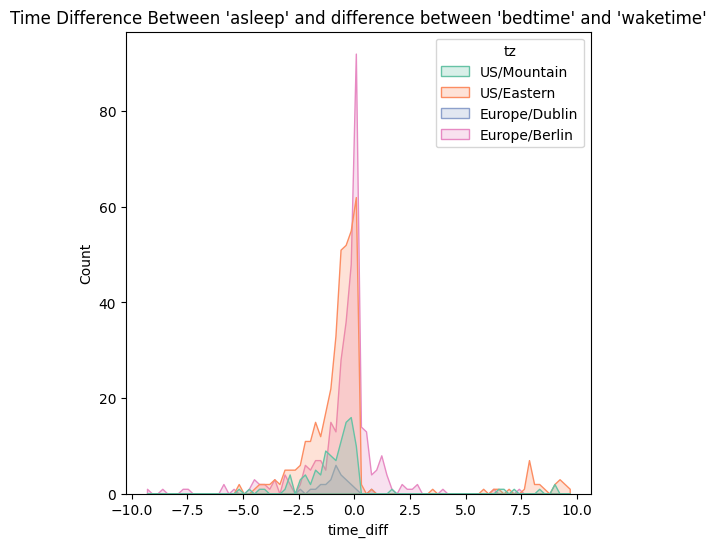

In [88]:
tdax = sns.histplot(data=cat_df, x='time_diff', element='poly', hue='tz', palette='Set2')
tdax.figure.set_size_inches(6, 6)
tdax.set_title("Time Difference Between 'asleep' and difference between 'bedtime' and 'waketime'")
plt.show(tdax)

In [89]:
cat_df['time_diff'].describe()

count    889.000000
mean      -0.434094
std        2.072731
min       -9.420000
25%       -1.100000
50%       -0.390000
75%        0.000000
max        9.790000
Name: time_diff, dtype: float64

In [90]:
# excluded_dates (outliers) = 2 std devs from mean
upper_lim = cat_df['time_diff'].mean() + 2*cat_df['time_diff'].std()
lower_lim = cat_df['time_diff'].mean() - 2*cat_df['time_diff'].std()
excluded_dates = cat_df.loc[(cat_df['time_diff'] > upper_lim) | \
    (cat_df['time_diff'] < lower_lim)]
print('loss: ', f'{np.round((len(excluded_dates)/len(cat_df)*100), 2)}%')

loss:  5.29%


In [91]:
# deleted outliers from dataset: filtered_df
filtered_df = cat_df.loc[cat_df.index.isin(excluded_dates.index) == False]
filtered_df.head()

bedtime            waketime     inBed     awake  \
2020-12-31 2020-12-31 01:11:26 2020-12-31 09:30:00  08:18:33  00:18:33   
2021-01-01 2021-01-01 01:42:00 2021-01-01 09:03:00  07:21:00  00:00:00   
2021-01-02 2021-01-01 23:11:00 2021-01-02 09:20:00  10:09:00  01:09:00   
2021-01-03 2021-01-03 00:30:10 2021-01-03 11:00:00  10:29:49  00:00:49   
2021-01-04 2021-01-04 01:09:00 2021-01-04 09:31:00  08:22:00  00:52:00   

           fellAsleepIn  sessions  asleep  efficiency   quality      deep  \
2020-12-31     00:18:33         1    8.00        96.3  05:24:16  01:45:00   
2021-01-01     00:00:00         1    7.35       100.0  04:59:28  01:13:30   
2021-01-02     00:00:00         1    9.00        88.7  05:46:46  03:00:00   
2021-01-03     00:00:49         1   10.48        99.9  08:07:23  02:14:47   
2021-01-04     00:00:00         1    7.50        89.6  05:16:53  02:30:00   

            ...  SpO2Min  SpO2Max  respAvg  respMin  respMax  REM  \
2020-12-31  ...     90.0     98.0      NaN      NaN      NaN        
2021-01-01  ...     92.0     96.0      NaN      NaN      NaN        
2021-01-02  ...     87.0     96.0      NaN      NaN      NaN        
2021-01-03  ...     85.0     98.0      NaN      NaN      NaN        
2021-01-04  ...     93.0     99.0      NaN      NaN      NaN        

                     tz   date_cats  timed_sleep_hrs  time_diff  
2020-12-31  US/Mountain   Late 2020             8.31      -0.31  
2021-01-01  US/Mountain  Early 2021             7.35       0.00  
2021-01-02  US/Mountain  Early 2021            10.15      -1.15  
2021-01-03  US/Mountain  Early 2021            10.50      -0.02  
2021-01-04  US/Mountain  Early 2021             8.37      -0.87  

[5 rows x 26 columns]

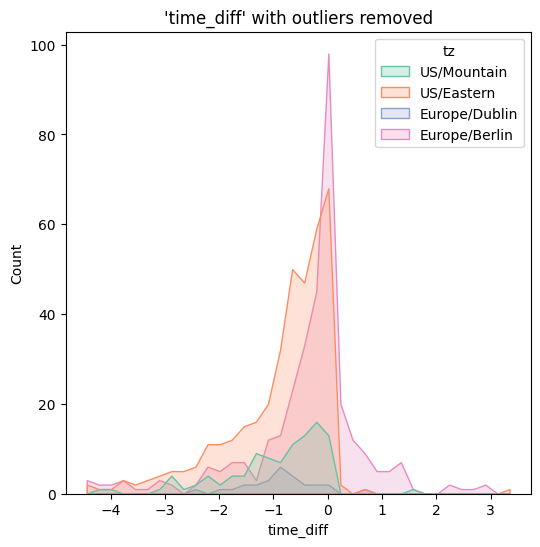

In [92]:
ftdax = sns.histplot(data=filtered_df, x='time_diff', element='poly', hue='tz', palette='Set2')
ftdax.figure.set_size_inches(6, 6)
ftdax.set_title("'time_diff' with outliers removed")
plt.show(ftdax)

In [93]:
# fuctions to get mean times on 24hr clock
def mean_angle(deg):
    return degrees(phase(sum(rect(1, radians(d)) for d in deg)/len(deg)))

def mean_time(times):
    if type(times.iloc[0]) != str:
        times = times.dt.strftime('%H:%M:%S')
    t_list = (time.split(':') for time in times if type(time) == str and time != '')
    seconds = ((float(s) + int(m) * 60 + int(h) * 3600) for h, m, s in t_list)
    day = 24 * 60 * 60
    to_angles = [s * 360. / day for s in seconds]
    mean_as_angle = mean_angle(to_angles)
    mean_seconds = mean_as_angle * day / 360.
    if mean_seconds < 0:
        mean_seconds += day
    h, m = divmod(mean_seconds, 3600)
    m, s = divmod(m, 60)
    return '%02i:%02i:%02i' % (h, m, s)

mean_bedtime = mean_time(filtered_df['bedtime'])
mean_waketime = mean_time(filtered_df['waketime'])
print('mean bedtime', mean_bedtime)
print('mean waketime', mean_waketime)
print('mean quality', mean_time(filtered_df['quality']))
print('mean REM', mean_time(filtered_df['REM']))
print('mean deep', mean_time(filtered_df['deep']))

mean bedtime 01:55:19
mean waketime 10:25:50
mean quality 04:38:18
mean REM 01:48:57
mean deep 02:05:50


In [94]:
mean_asleep = np.round(np.mean(filtered_df['asleep'].values), 2)
print('mean asleep', mean_asleep)
print('standard deviation asleep: ', np.std(filtered_df['asleep'].values))
print('var asleep: ', np.var(filtered_df['asleep'].values))

mean asleep 7.72
standard deviation asleep:  1.5983889313994328
var asleep:  2.5548471760202207


### Visualizations

In [95]:
# viz_df functions

# change scale to noon starting
def bedtime_conv_and_cat(bed_times):
    offset_times = []
    bed_times = bed_times.dt.strftime('%H:%M:%S')

    for bt in bed_times:
        h, m, s = bt.split(':')
        h = int(h)

        if h >= 12:
            offset_times.append(round((h-12) + int(m)/60 + int(s)/3600, 2))
        else:
            offset_times.append(round((h+12) + int(m)/60 + int(s)/3600, 2))

    return offset_times

def waketime_convert(wake_times):

    new_times = []

    wake_times = wake_times.dt.strftime('%H:%M:%S')

    for wt in wake_times:
        if type(wt) != str:
            print('type error: ', wt, type(wt))
            break

        h, m, s = wt.split(':')
        h = int(h)
        wthr = round(h + int(m)/60 + int(s)/3600, 2)
        new_times.append(wthr)

    return new_times

# change time deltas to hours
def time_delta_to_hrs(df):
    df[df == None] = '0:00:00'
    for col in df:
        df[col] = np.round(pd.to_timedelta(df[col]).dt.total_seconds() / 3600, 2)
    return df

# # tz encode
# def tz_code(tz):
#     if tz == 'US/Mountain':
#         return 0
#     elif tz == 'US/Eastern':
#         return 1
#     elif tz == 'Europe/Dublin':
#         return 2
#     elif tz == 'Europe/Berlin':
#         return 3
#     else:
#         return 4

In [96]:
# viz_df for plotting: created categorical columns for bedtime, waketime, and asleep; offset bedtime
viz_df = filtered_df.copy()

viz_df = viz_df.loc[:, ['bedtime', 'waketime', 'asleep', 'quality', 'deep', 'REM', 'sleepBPM', 'SpO2Avg', 'tz']]
viz_df.insert(1, 'bedtime_offset', bedtime_conv_and_cat(viz_df['bedtime']))
viz_df.drop(columns=['bedtime'], inplace=True)
viz_df['waketime'] = waketime_convert(viz_df['waketime'])
viz_df.loc[:, ['quality', 'deep', 'REM']] = time_delta_to_hrs(viz_df.loc[:, ['quality', 'deep', 'REM']])
# viz_df['tz_code'] = viz_df['tz'].apply(tz_code)
viz_df.tail()

bedtime_offset  waketime  asleep quality  deep   REM  sleepBPM  \
2023-09-25           13.88     10.57    9.14    6.56  0.98  2.33      54.0   
2023-09-26           18.58     12.98    6.70    5.26  1.42  2.02      56.7   
2023-09-27           15.15     12.00    8.79    6.74  1.04  2.17      52.8   
2023-09-29           12.20     10.07   10.31    7.86  1.08  2.98      58.9   
2023-09-30           18.60     11.52    4.97    4.01  0.86  1.23      61.7   

            SpO2Avg             tz  
2023-09-25     97.1  Europe/Berlin  
2023-09-26     97.2  Europe/Berlin  
2023-09-27     97.5  Europe/Berlin  
2023-09-29     95.9  Europe/Berlin  
2023-09-30     94.0  Europe/Berlin

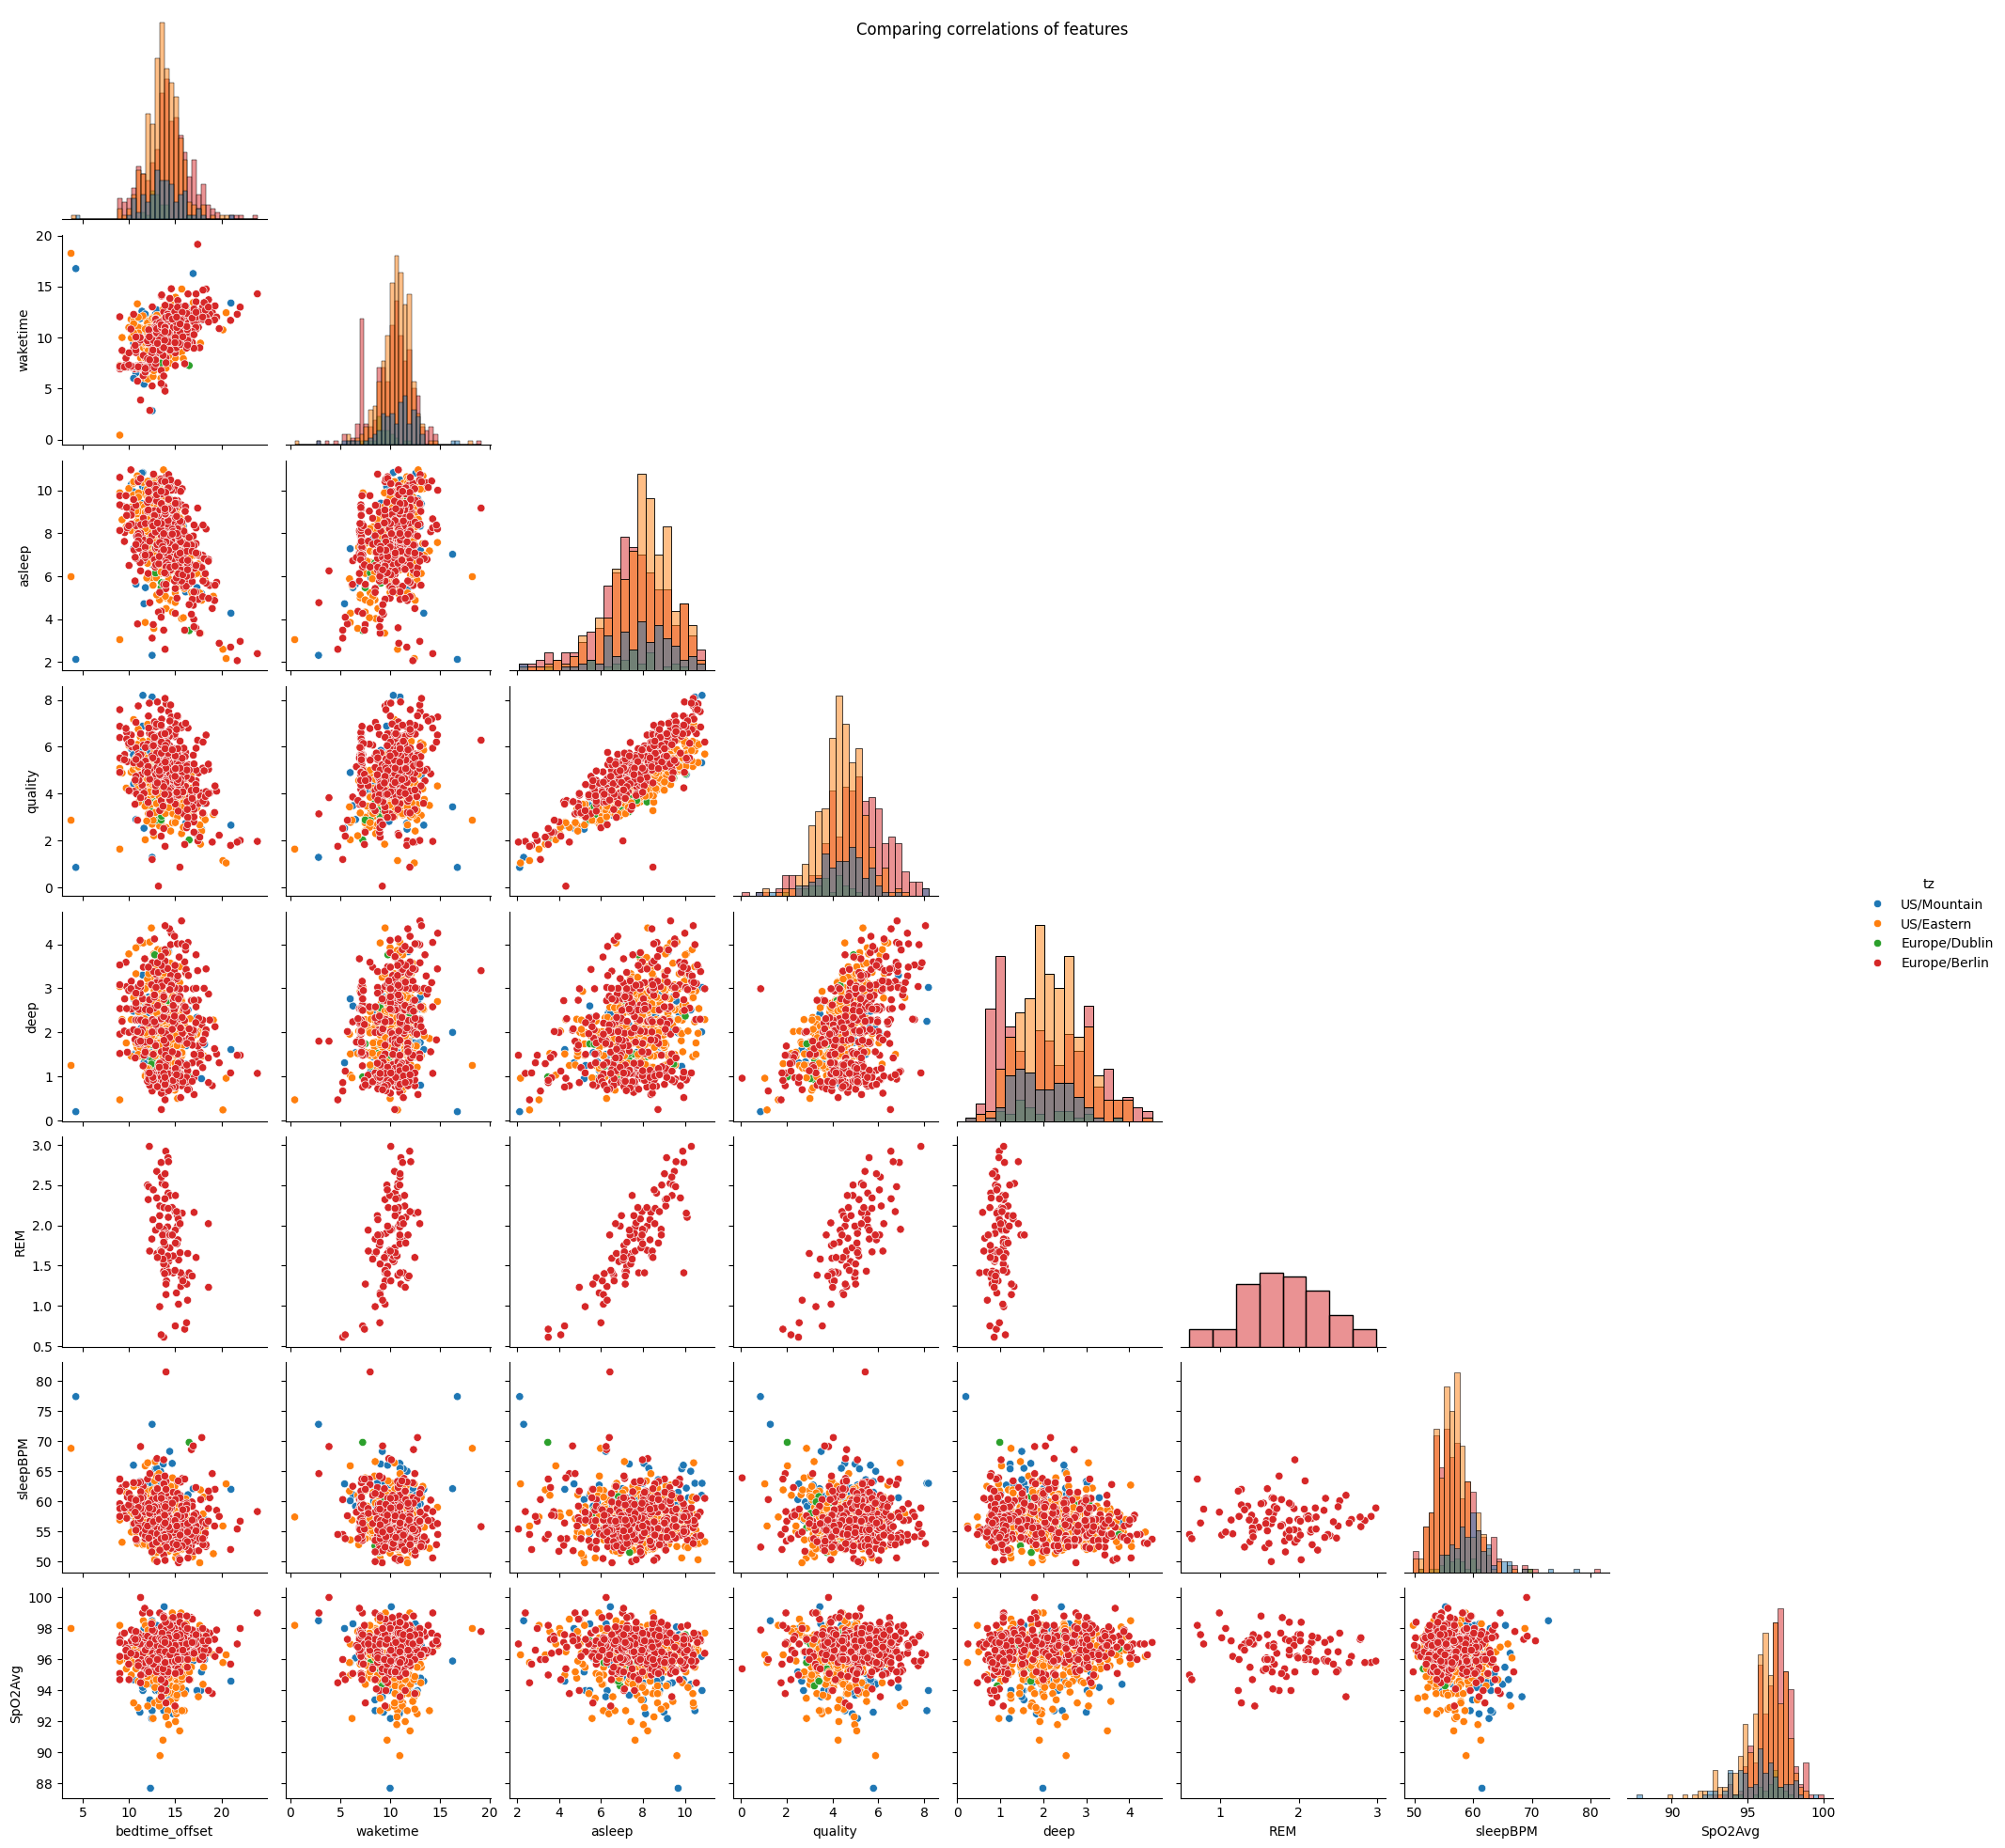

In [97]:
pair_df = viz_df.copy()
ax = sns.pairplot(pair_df, hue="tz", diag_kind="hist", corner=True)
ax.fig.suptitle("Comparing correlations of features")
plt.show(ax)

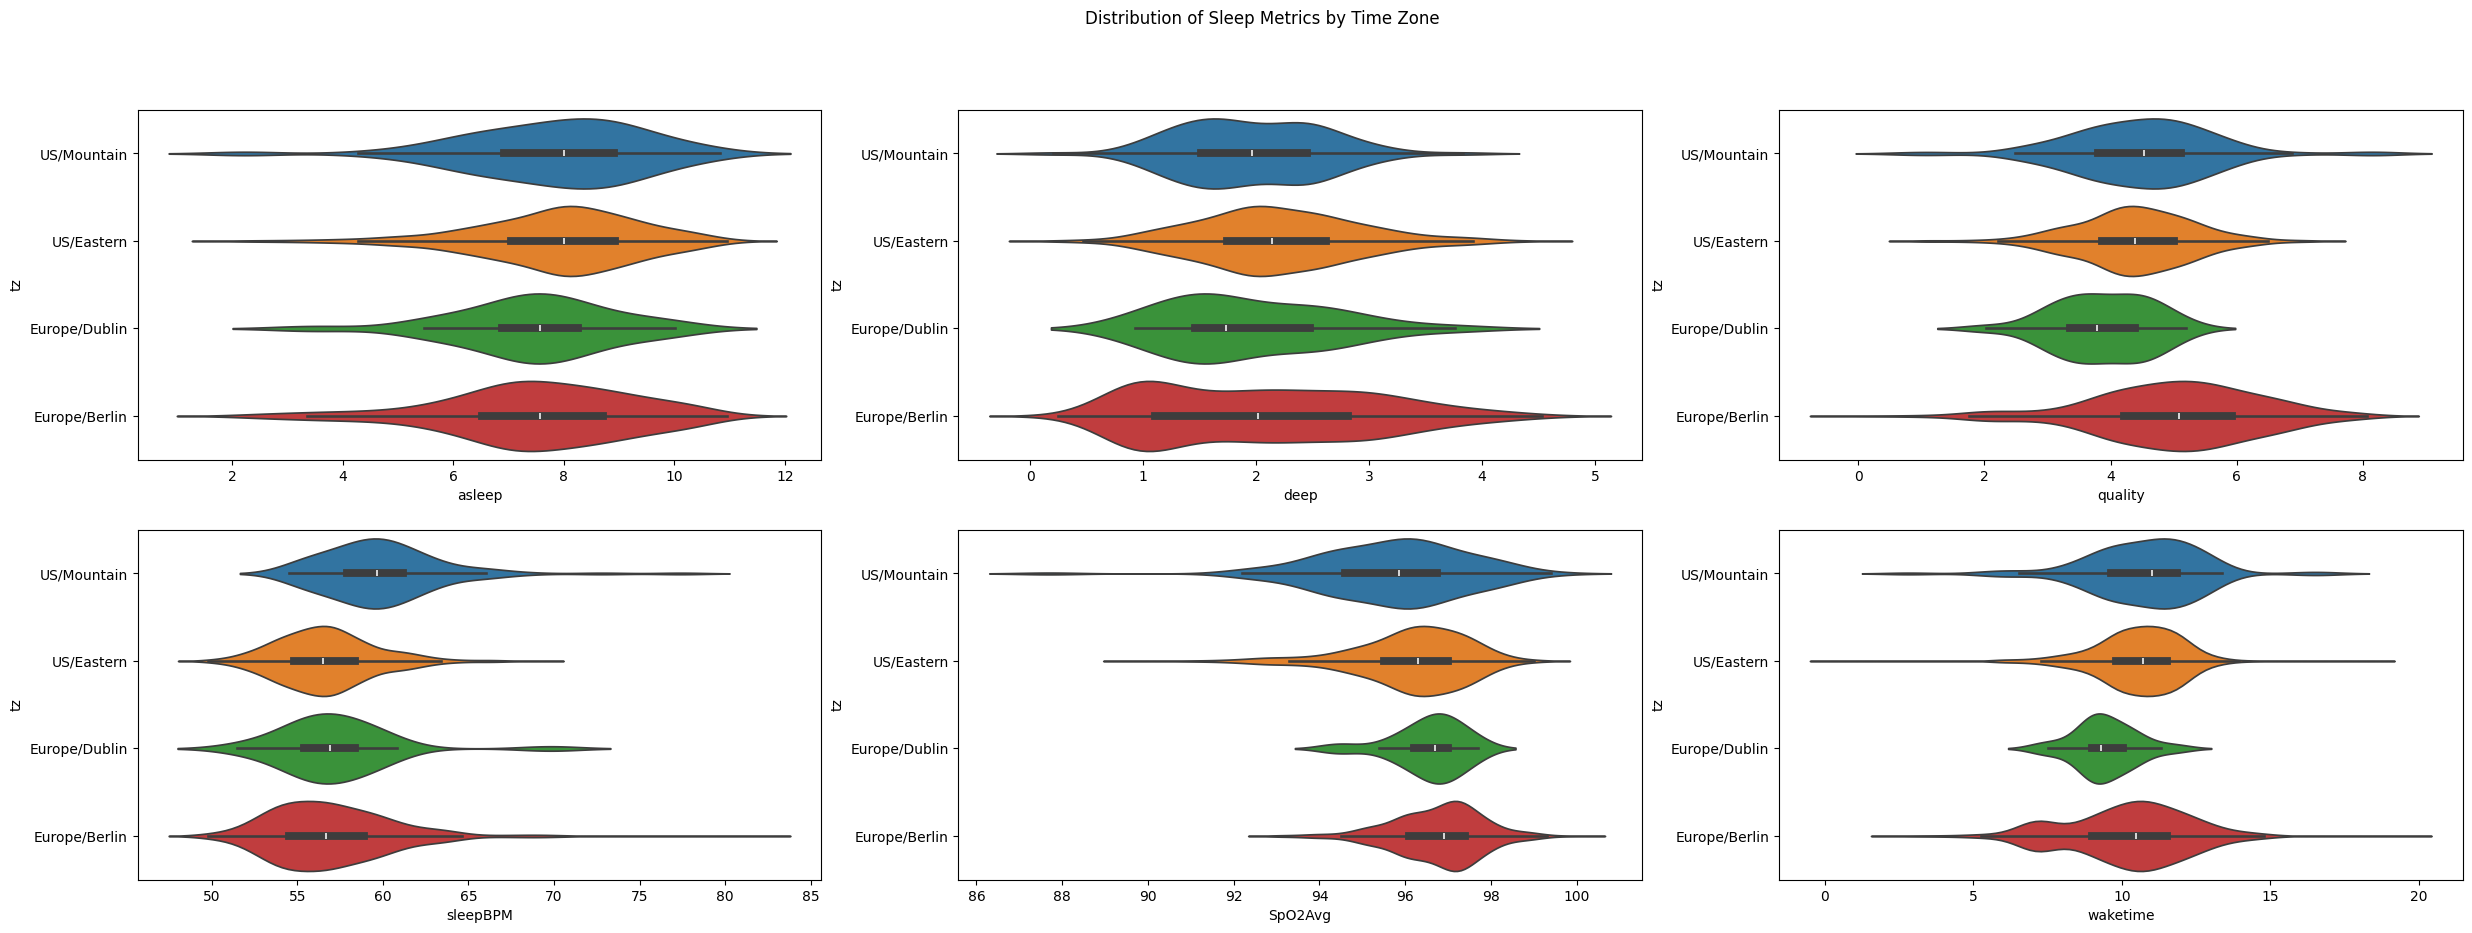

In [98]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
a = sns.violinplot(data=pair_df, x="asleep", y="tz", ax=ax[0, 0], hue='tz')
b = sns.violinplot(data=pair_df, x="deep", y="tz", ax=ax[0, 1], hue='tz')
c = sns.violinplot(data=pair_df, x="quality", y="tz", ax=ax[0, 2], hue='tz')
d = sns.violinplot(data=pair_df, x="sleepBPM", y="tz", ax=ax[1, 0], hue='tz')
e = sns.violinplot(data=pair_df, x="SpO2Avg", y="tz", ax=ax[1, 1], hue='tz')
f = sns.violinplot(data=pair_df, x="waketime", y="tz", ax=ax[1, 2], hue='tz')
fig.suptitle('Distribution of Sleep Metrics by Time Zone')
plt.show(fig)

In [99]:
# time series plots (ts_df) - normalize bedtime and waketime datetimes
ts_df = filtered_df.loc[:, ['bedtime', 'waketime', 'asleep', 'quality', 'deep', 'REM', 'sleepBPM', 'SpO2Avg', 'tz']]
ts_df['bedtime'] = ts_df['bedtime'].dt.strftime('%H:%M')
ts_df['waketime'] = ts_df['waketime'].dt.strftime('%H:%M')
# if bedtime is after waketime, make bedtime date 1900-01-01 and waketime date 1900-01-02, else, make both 1900-01-02
ts_df.loc[ts_df['bedtime'] > ts_df['waketime'], 'bedtime'] = '1900-01-01 ' + ts_df['bedtime']
ts_df.loc[ts_df['bedtime'] < ts_df['waketime'], 'bedtime'] = '1900-01-02 ' + ts_df['bedtime']
ts_df.loc[:, 'waketime'] = '1900-01-02 ' + ts_df['waketime']
ts_df['bedtime'] = pd.to_datetime(ts_df['bedtime'], format='%Y-%m-%d %H:%M')
ts_df['waketime'] = pd.to_datetime(ts_df['waketime'], format='%Y-%m-%d %H:%M')
ts_df


bedtime            waketime  asleep   quality  \
2020-12-31 1900-01-02 01:11:00 1900-01-02 09:30:00    8.00  05:24:16   
2021-01-01 1900-01-02 01:42:00 1900-01-02 09:03:00    7.35  04:59:28   
2021-01-02 1900-01-01 23:11:00 1900-01-02 09:20:00    9.00  05:46:46   
2021-01-03 1900-01-02 00:30:00 1900-01-02 11:00:00   10.48  08:07:23   
2021-01-04 1900-01-02 01:09:00 1900-01-02 09:31:00    7.50  05:16:53   
...                        ...                 ...     ...       ...   
2023-09-25 1900-01-02 01:53:00 1900-01-02 10:34:00    9.14  06:33:28   
2023-09-26 1900-01-02 06:35:00 1900-01-02 12:59:00    6.70  05:15:45   
2023-09-27 1900-01-02 03:09:00 1900-01-02 12:00:00    8.79  06:44:19   
2023-09-29 1900-01-02 00:12:00 1900-01-02 10:04:00   10.31  07:51:19   
2023-09-30 1900-01-02 06:36:00 1900-01-02 11:31:00    4.97  04:00:34   

                deep       REM  sleepBPM  SpO2Avg             tz  
2020-12-31  01:45:00                63.0     94.5    US/Mountain  
2021-01-01  01:13:30                66.2     93.7    US/Mountain  
2021-01-02  03:00:00                63.3     92.6    US/Mountain  
2021-01-03  02:14:47                63.0     92.7    US/Mountain  
2021-01-04  02:30:00                61.2     96.5    US/Mountain  
...              ...       ...       ...      ...            ...  
2023-09-25  00:59:00  02:19:30      54.0     97.1  Europe/Berlin  
2023-09-26  01:25:30  02:01:30      56.7     97.2  Europe/Berlin  
2023-09-27  01:02:30  02:10:00      52.8     97.5  Europe/Berlin  
2023-09-29  01:05:00  02:59:00      58.9     95.9  Europe/Berlin  
2023-09-30  00:51:30  01:13:30      61.7     94.0  Europe/Berlin  

[842 rows x 9 columns]

In [100]:
mean_bedtime = pd.to_datetime(f'1900-01-02 {mean_bedtime}', format='%Y-%m-%d %H:%M:%S')
mean_waketime = pd.to_datetime(f'1900-01-02 {mean_waketime}', format='%Y-%m-%d %H:%M:%S')

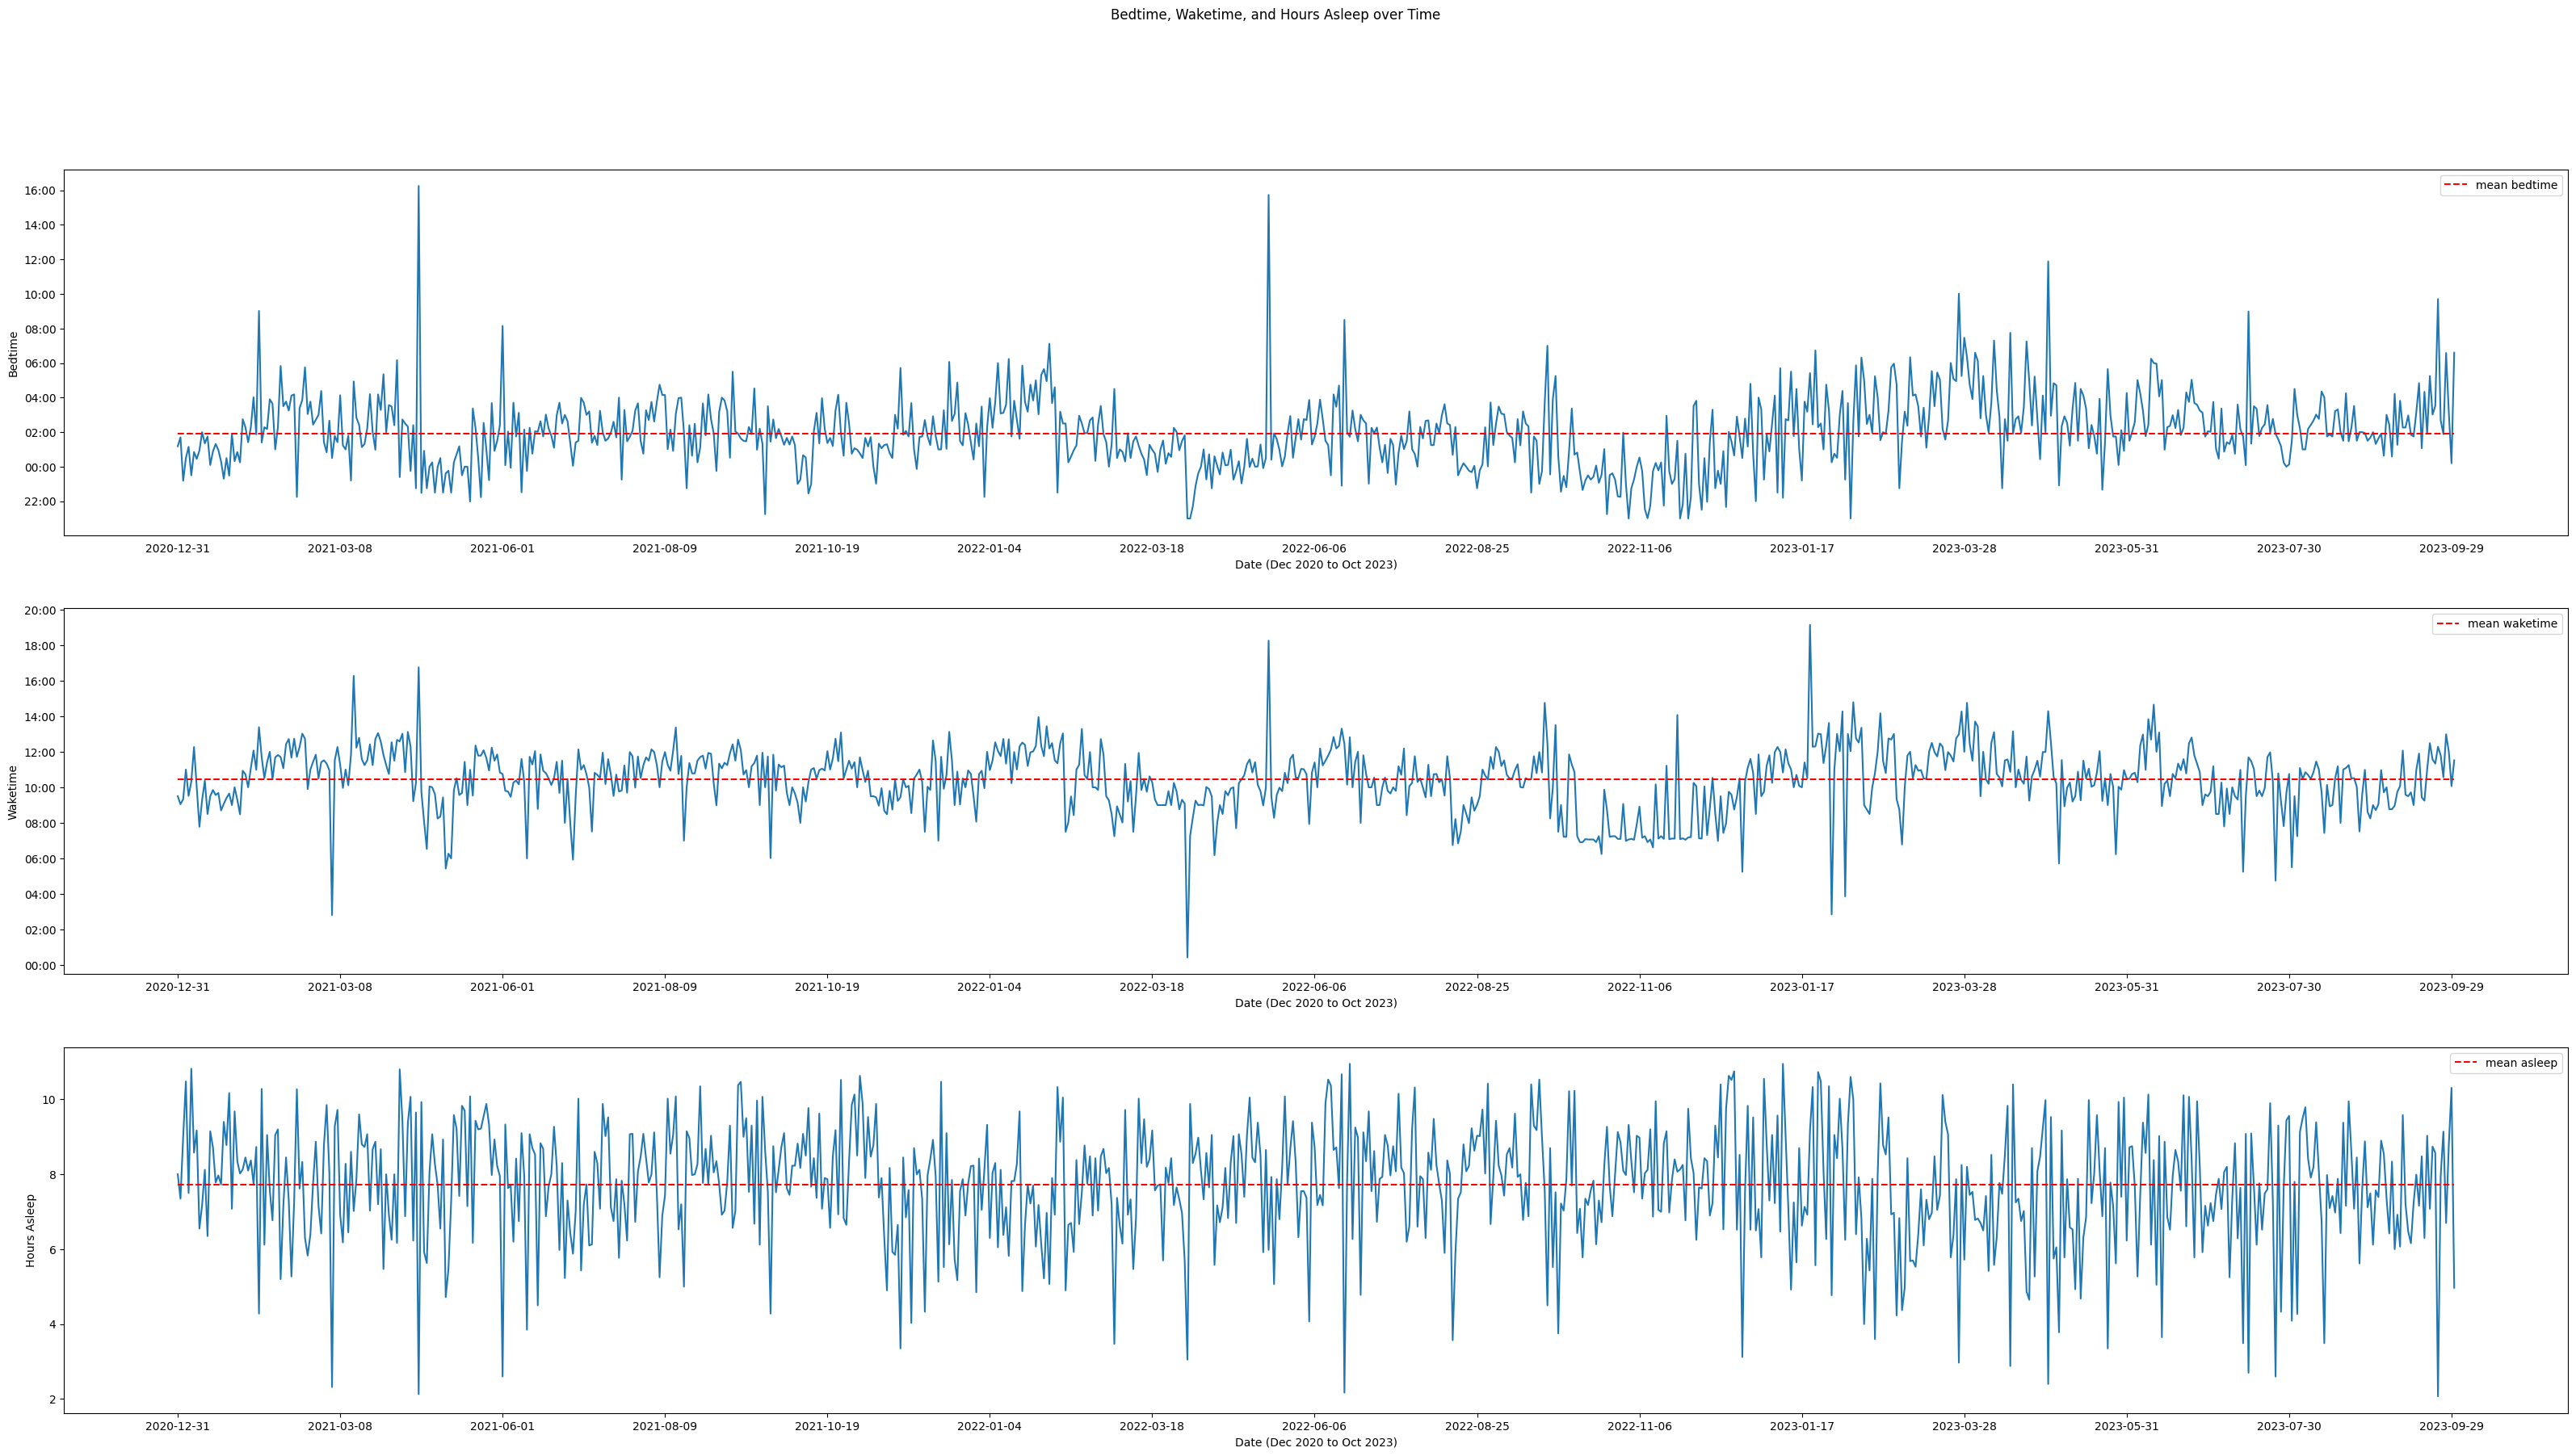

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 20))

a = sns.lineplot(data=ts_df, x=ts_df.index, y='bedtime', ax=ax1)
a1 = sns.lineplot(x=ts_df.index, y=mean_bedtime, ax=ax1, color='red', label='mean bedtime', linestyle='--')
ax1.set_ylabel('Bedtime')
ax1.set_xlabel('Date (Dec 2020 to Oct 2023)')
x_ticks = ax1.get_xticks()
x_labels = ax1.get_xticklabels()
new_labels = []
new_ticks = []
for idx, lbl in enumerate(x_labels):
    if idx % 60 == 0:
        new_labels.append(lbl)
        new_ticks.append(x_ticks[idx])
ax1.tick_params(axis='x', bottom=False, top=False)
ax1.set_xticks(new_ticks)
ax1.set_xticklabels(new_labels)
y_labs = ax1.get_yticklabels()
new_y_labels = []
for idx, lbl in enumerate(y_labs):
    nlbl = f'{lbl.get_text().split(" ")[1]}:00'
    new_y_labels.append(nlbl)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(new_y_labels)

b = sns.lineplot(data=ts_df, x=ts_df.index, y='waketime', ax=ax2)
b1 = sns.lineplot(x=ts_df.index, y=mean_waketime, ax=ax2, color='red', label='mean waketime', linestyle='--')
ax2.set_ylabel('Waketime')
ax2.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax2.set_xticks(new_ticks)
ax2.set_xticklabels(new_labels)
y_labs2 = ax2.get_yticklabels()
new_y_labels2 = []
for idx, lbl in enumerate(y_labs2):
    nlbl = f'{lbl.get_text().split(" ")[1]}:00'
    new_y_labels2.append(nlbl)
ax2.set_yticks(ax2.get_yticks())
ax2.set_yticklabels(new_y_labels2)

c = sns.lineplot(data=ts_df, x=ts_df.index, y='asleep', ax=ax3)
c1 = sns.lineplot(x=ts_df.index, y=mean_asleep, ax=ax3, color='red', label='mean asleep', linestyle='--')
ax3.set_ylabel('Hours Asleep')
ax3.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax3.set_xticks(new_ticks)
ax3.set_xticklabels(new_labels)

fig.suptitle('Bedtime, Waketime, and Hours Asleep over Time')
plt.show(fig)

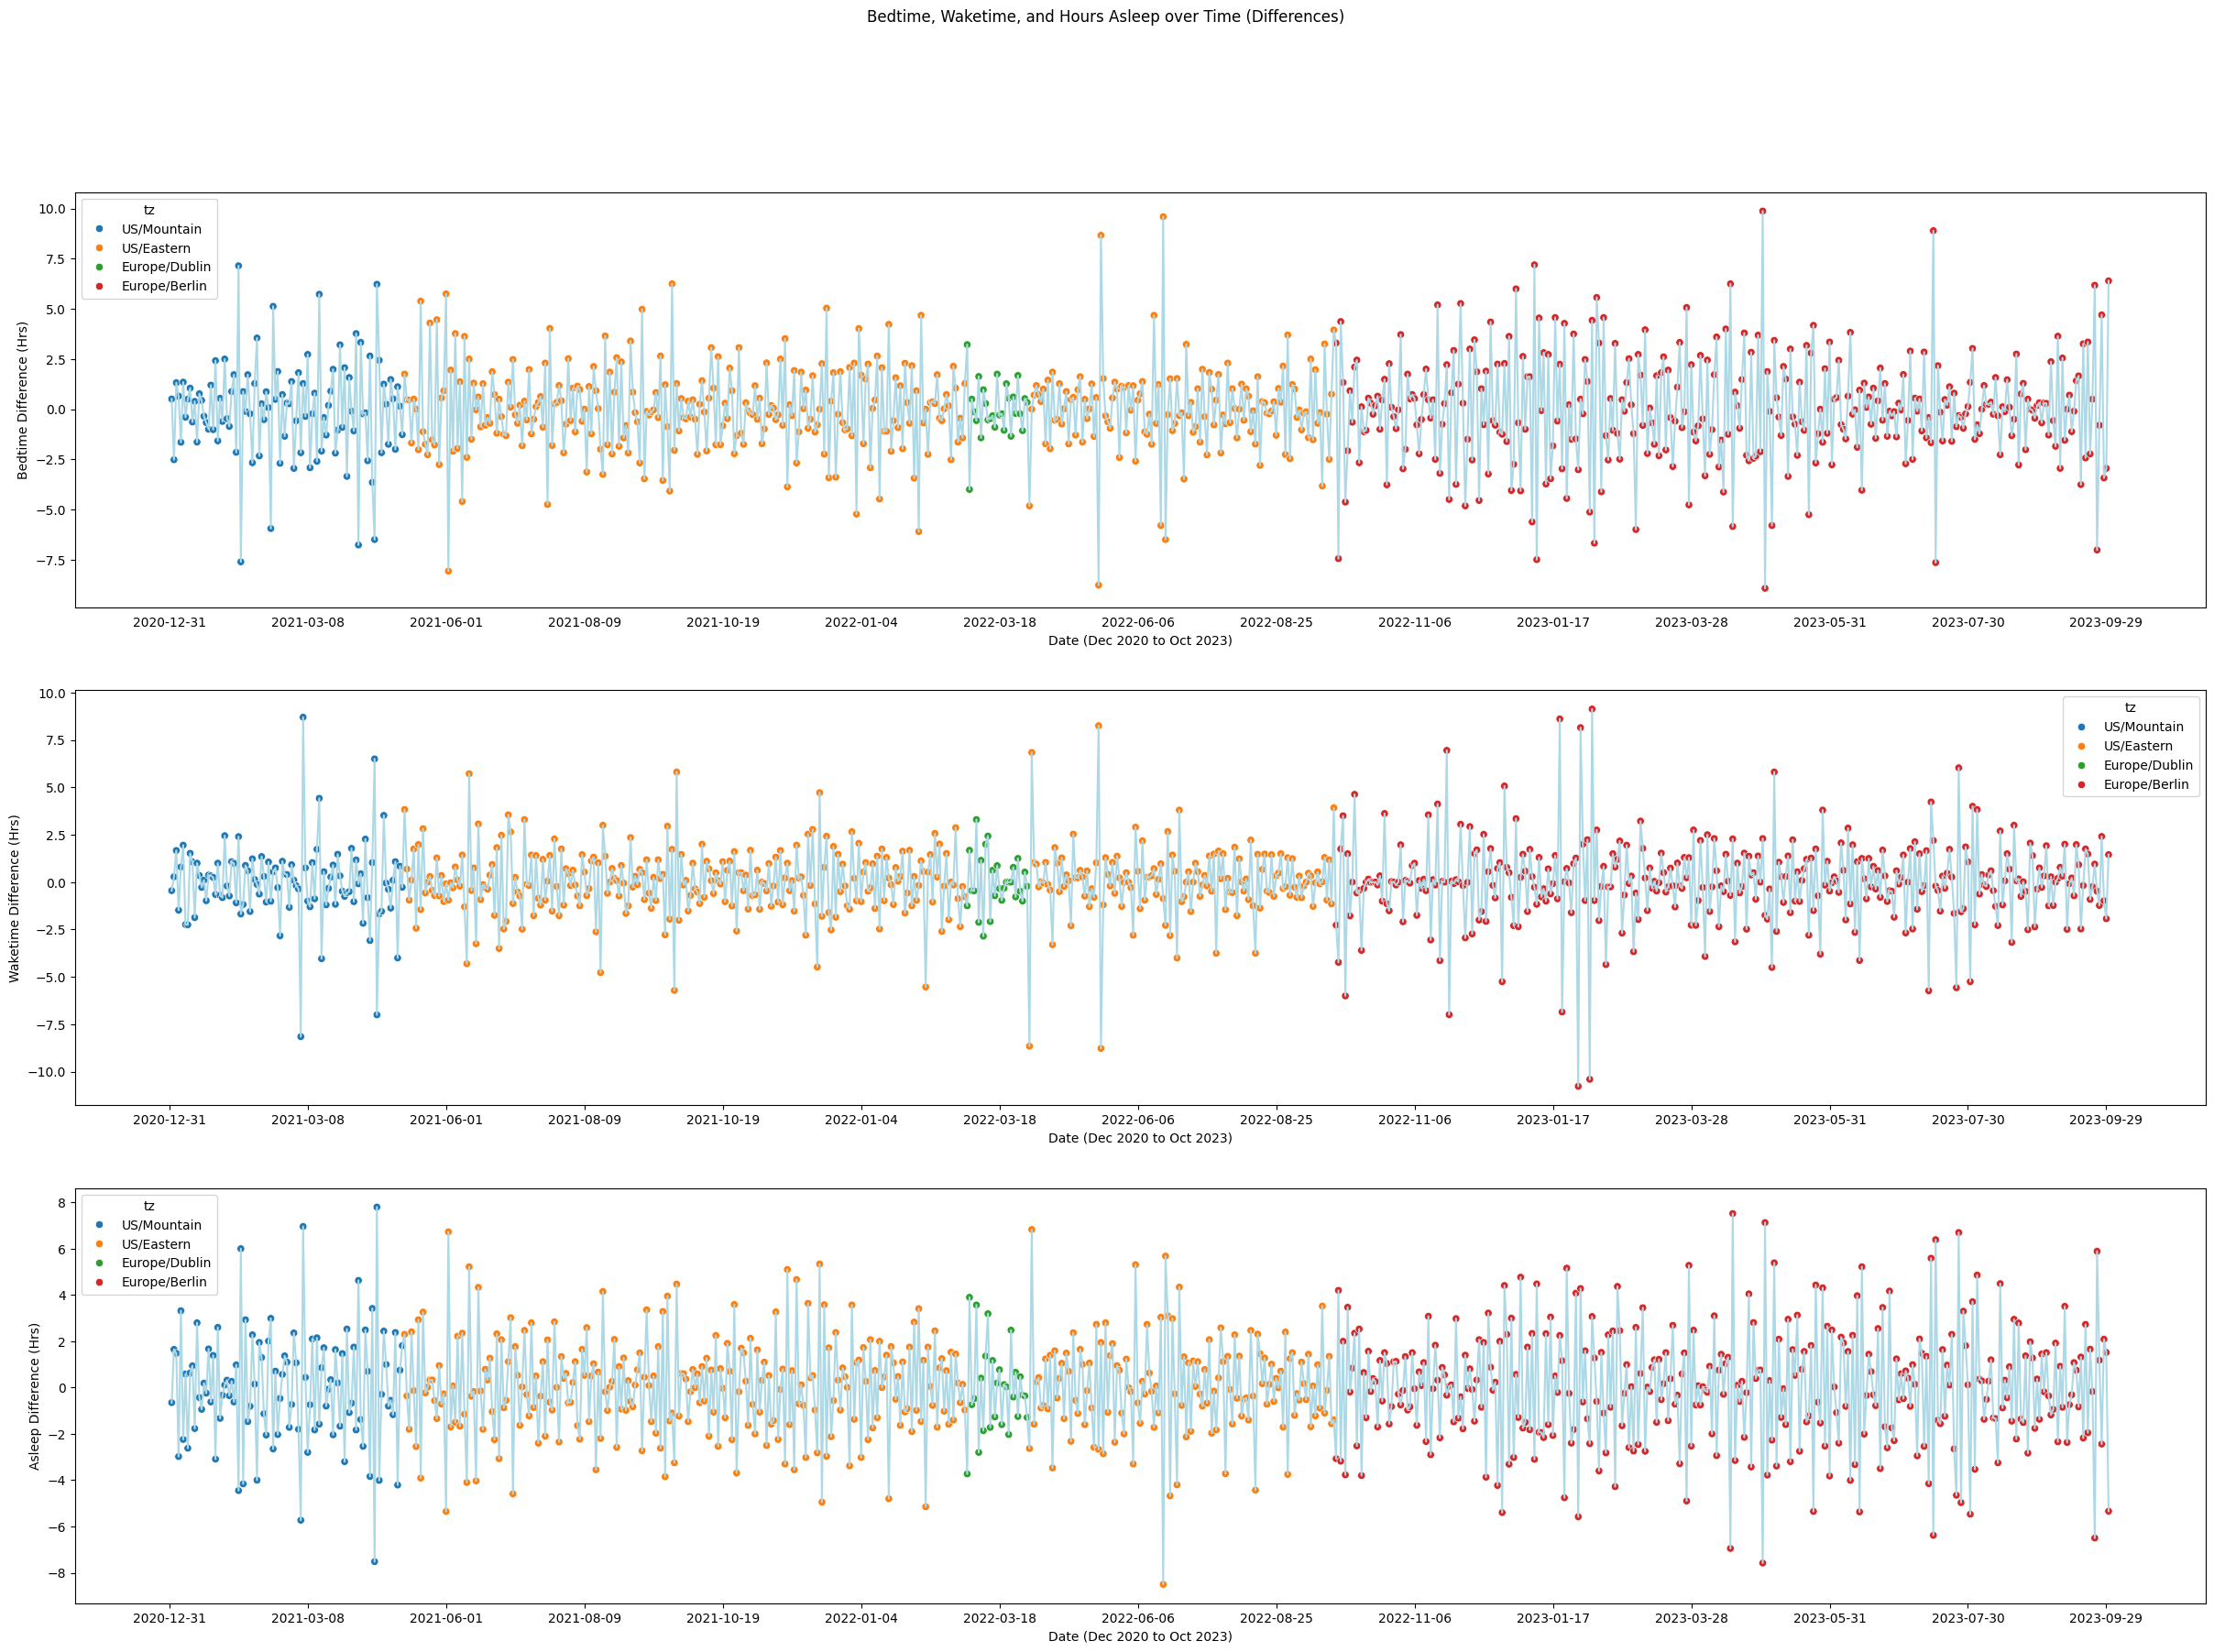

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 20))

a = sns.lineplot(x=viz_df.index, y=viz_df['bedtime_offset'].diff(), ax=ax1, color='lightblue')
a1 = sns.scatterplot(x=viz_df.index, y=viz_df['bedtime_offset'].diff(), ax=ax1, hue=viz_df['tz'])
ax1.set_ylabel('Bedtime Difference (Hrs)')
ax1.set_xlabel('Date (Dec 2020 to Oct 2023)')
x_ticks = ax1.get_xticks()
x_labels = ax1.get_xticklabels()
new_labels = []
new_ticks = []
for idx, lbl in enumerate(x_labels):
    if idx % 60 == 0:
        new_labels.append(lbl)
        new_ticks.append(x_ticks[idx])
ax1.tick_params(axis='x', bottom=False, top=False)
ax1.set_xticks(new_ticks)
ax1.set_xticklabels(new_labels)

b = sns.lineplot(x=viz_df.index, y=viz_df['waketime'].diff(), ax=ax2, color='lightblue')
b1 = sns.scatterplot(x=viz_df.index, y=viz_df['waketime'].diff(), ax=ax2, hue=viz_df['tz'])
ax2.set_ylabel('Waketime Difference (Hrs)')
ax2.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax2.set_xticks(new_ticks)
ax2.set_xticklabels(new_labels)

c = sns.lineplot(x=viz_df.index, y=viz_df['asleep'].diff(), ax=ax3, color='lightblue')
c1 = sns.scatterplot(x=viz_df.index, y=viz_df['asleep'].diff(), ax=ax3, hue=viz_df['tz'])
ax3.set_ylabel('Asleep Difference (Hrs)')
ax3.set_xlabel('Date (Dec 2020 to Oct 2023)')
ax3.set_xticks(new_ticks)
ax3.set_xticklabels(new_labels)

fig.suptitle('Bedtime, Waketime, and Hours Asleep over Time (Differences)')
plt.show(fig)

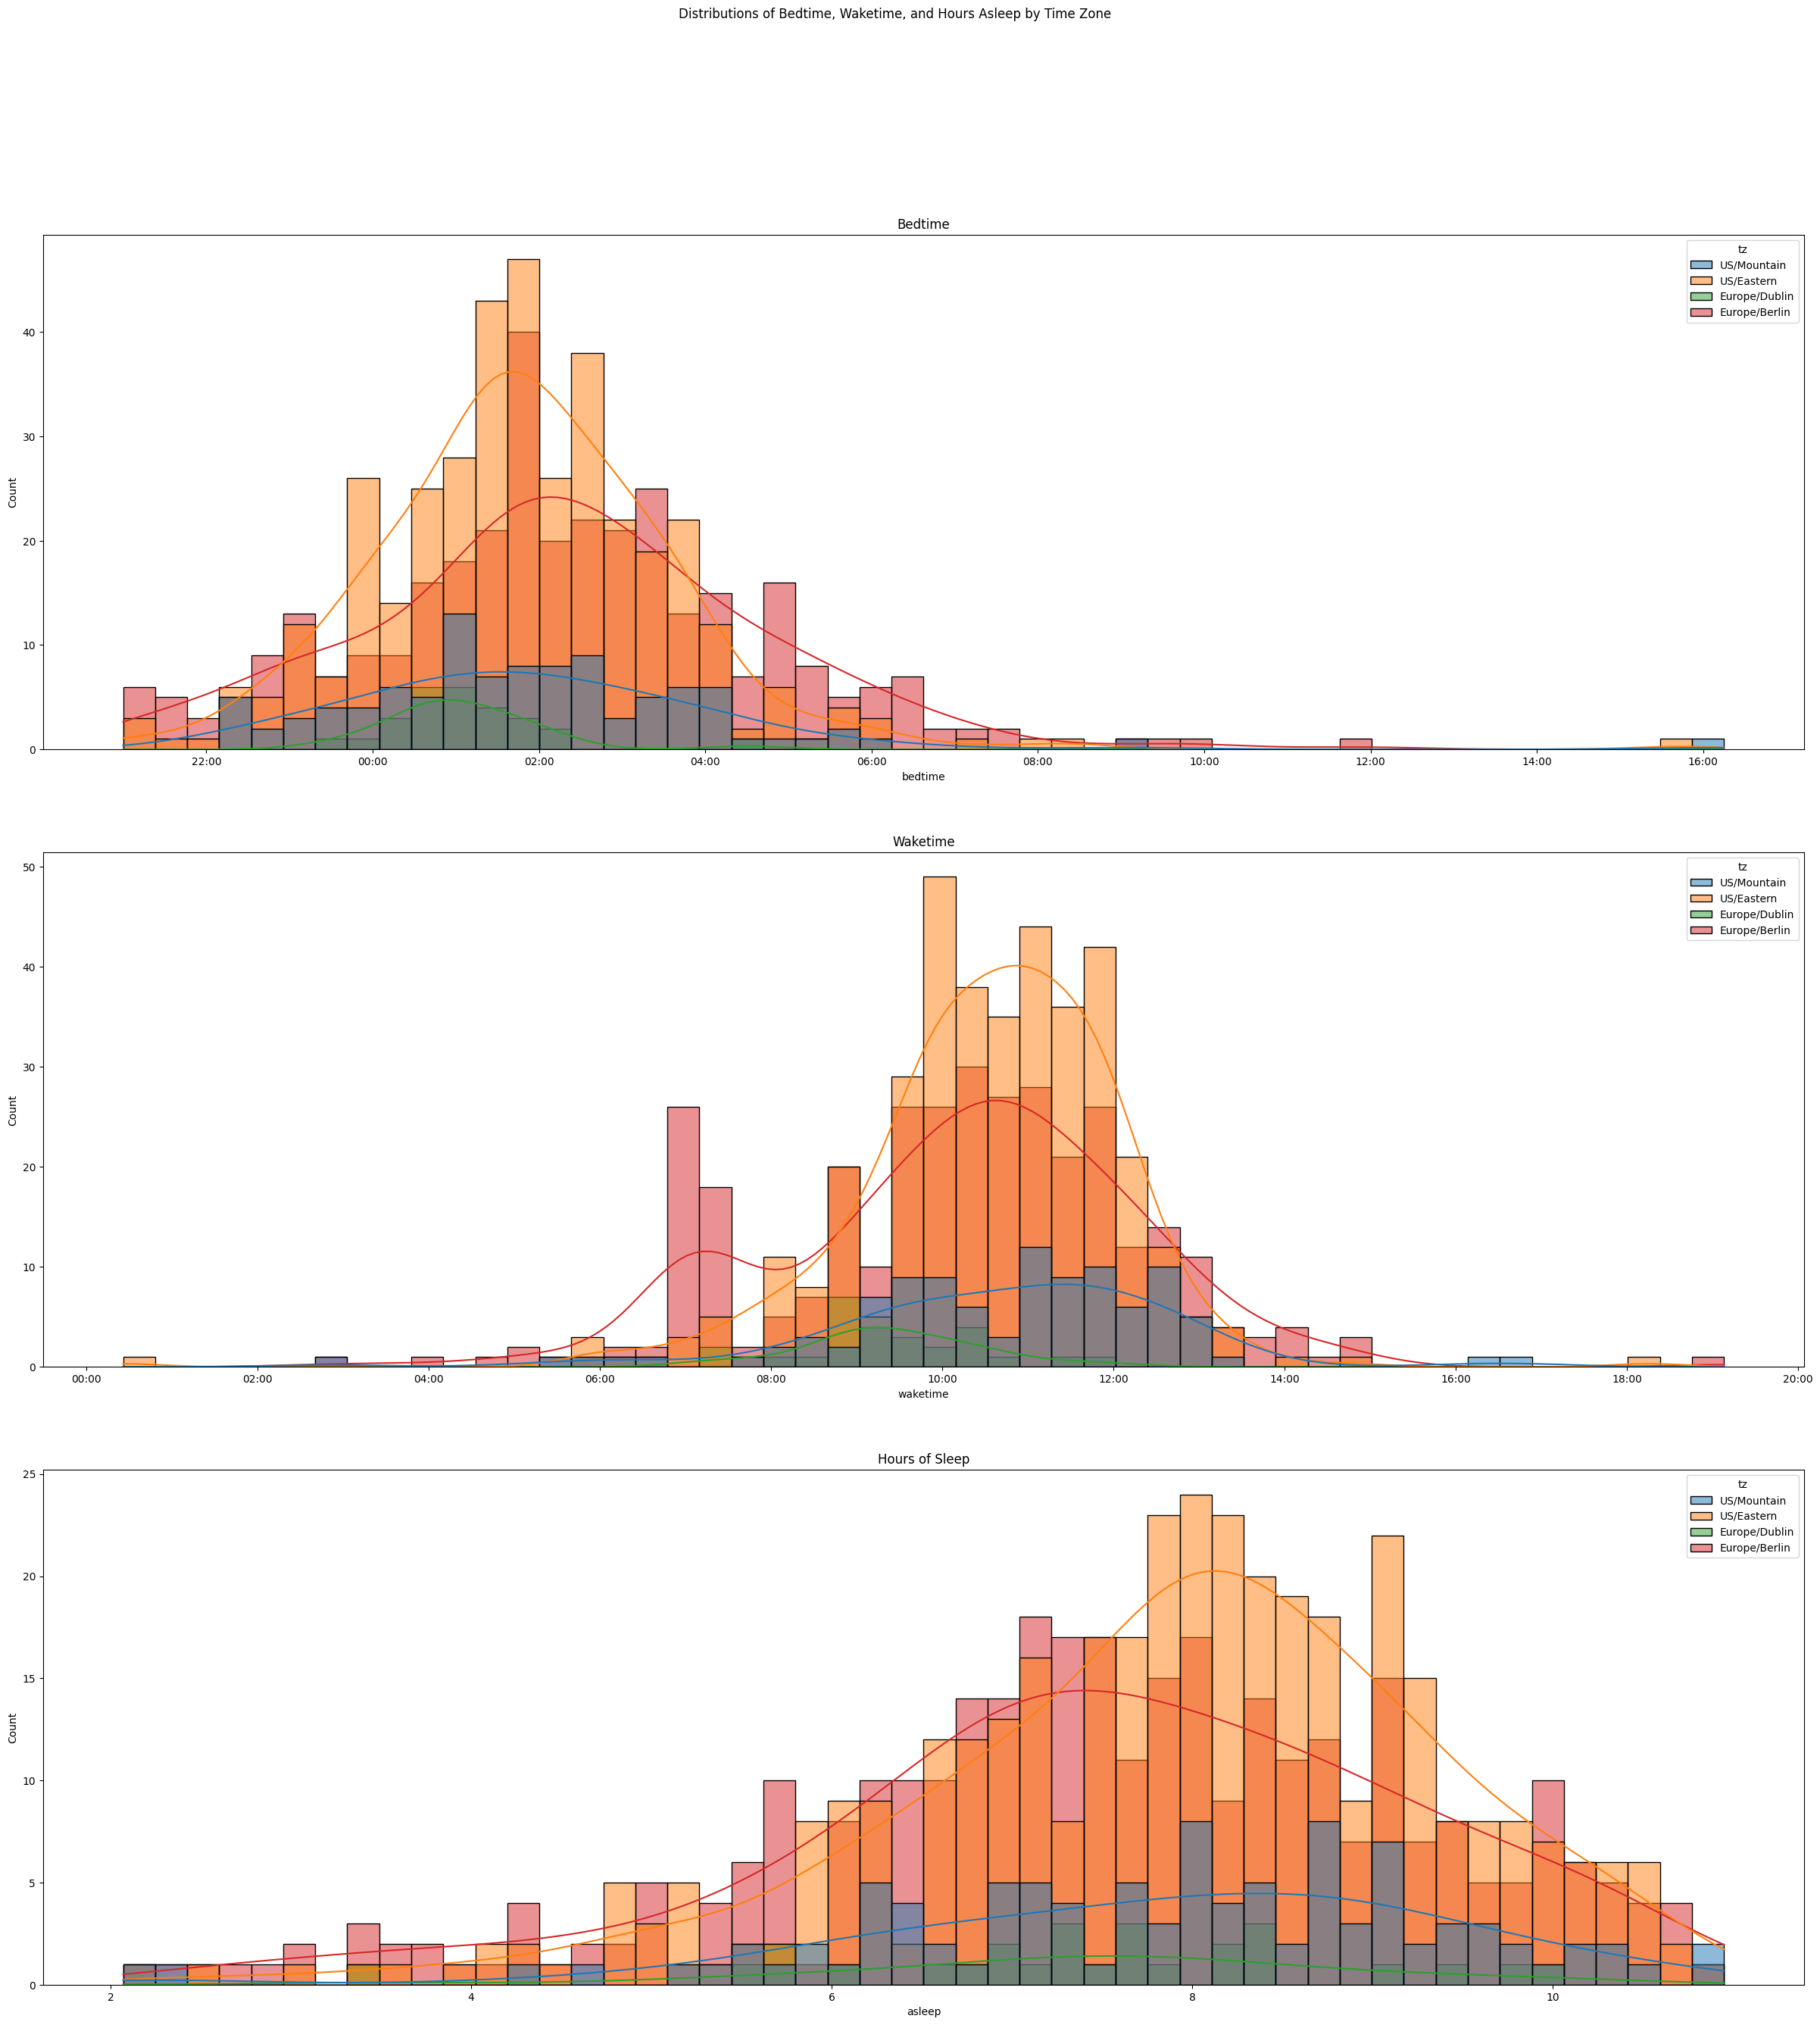

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 30))

a = sns.histplot(data=ts_df, x='bedtime', hue='tz', ax=ax1, kde=True, bins=50)
b = sns.histplot(data=ts_df, x='waketime', hue='tz', ax=ax2, kde=True, bins=50)
c = sns.histplot(data=ts_df, x='asleep', hue='tz', ax=ax3, kde=True, bins=50)

x_labs = ax1.get_xticklabels()
new_labels = []
for idx, lbl in enumerate(x_labs):
    nlbl = f'{lbl.get_text().split(" ")[1]}:00'
    new_labels.append(nlbl)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(new_labels)
ax1.set_title('Bedtime')

x_labs2 = ax2.get_xticklabels()
new_labels2 = []
for idx, lbl in enumerate(x_labs2):
    nlbl = f'{lbl.get_text().split(" ")[1]}:00'
    new_labels2.append(nlbl)
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(new_labels2)
ax2.set_title('Waketime')

ax3.set_title('Hours of Sleep')
fig.suptitle('Distributions of Bedtime, Waketime, and Hours Asleep by Time Zone')

plt.show(fig)